# Benjamin BENTEKE
## AIMS-SENEGAL 2019-2020
### TRAVAIL PRATIQUE INDIVIDUEL

# REGRESSION LINEAIRE AVEC NUMPY CAS DE PLUSIEURS FEATURES

In [1]:
import numpy as np
from sklearn.datasets import make_regression # Permet de generer les données de maniere aléatoire dans scikit learn
import matplotlib.pyplot as plt

# STEP 1: DATASET 
## x est une matrice non plus un vecteur

In [2]:
x,y=make_regression(n_samples=100, n_features=2, noise=10) # on cree deux tableaux: x et y donc (x,y) notre dataset

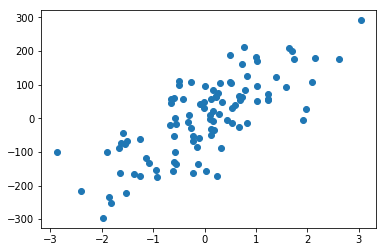

In [3]:
plt.scatter(x[:,0],y)

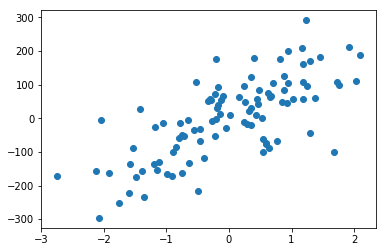

In [4]:
plt.scatter(x[:,1],y)

### Verification de la dimension de matrice

In [5]:
print(x.shape,y.shape)

(100, 2) (100,)


##### Il faut redimensionner y

In [6]:
y=y.reshape(y.shape[0],1) # y.shape[0] veut dire nombre de lignes de y

In [7]:
print(x.shape)
print(y.shape)

(100, 2)
(100, 1)


## Creation de la matrice X

In [8]:
np.random.seed(2)
X=np.hstack((x,np.ones((x.shape[0],1))))
print(X.shape)
print(X[:10])

(100, 3)
[[-1.53232846 -1.60214234  1.        ]
 [-0.93340233 -1.4866404   1.        ]
 [-1.89873679  0.54527215  1.        ]
 [ 3.03492334  1.23071433  1.        ]
 [-0.56061343  0.28212624  1.        ]
 [-0.60116456  1.37005506  1.        ]
 [ 1.73602838  0.82232469  1.        ]
 [-0.57743976  0.52482969  1.        ]
 [ 1.01283528  1.29594895  1.        ]
 [ 0.83157266  0.87235375  1.        ]]


In [9]:
theta=np.random.randn(3,1) # un vecteur aléatoire normale
print(theta.shape)
print(theta)

(3, 1)
[[-0.41675785]
 [-0.05626683]
 [-2.1361961 ]]


# STEP 2 CREATION OF NON-LINEAR MODEL

In [10]:
def model(X,theta):
    return X.dot(theta) # produit matricel entre X et theta

### Test de la fonction model

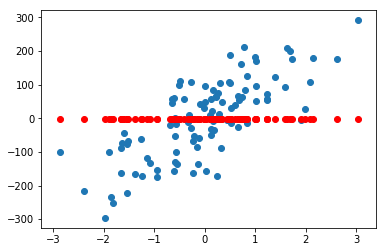

In [11]:
#model(X,theta)
plt.scatter(x[:,0],y)
# plt.scatter(x,y)
plt.scatter(x[:,0],model(X,theta),c='r') 

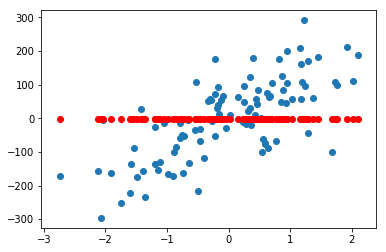

In [12]:
#model(X,theta)
plt.scatter(x[:,1],y)
# plt.scatter(x,y)
plt.scatter(x[:,1],model(X,theta),c='r') # car la pente est negatives

# STEP 3 FONCTION COUT

In [13]:
def cost_function(X,y,theta):
    m=len(y)
    return 1/(2*m)*np.sum((model(X,theta)-y)**2)  

In [14]:
cost_function(X,y,theta) # On veut que cost_function tende vers 0

6907.626579685531

# STEP 4 GRADIENTS GRADIENT DESCENT

In [15]:
def grad(X,y,theta):
    m=len(y)
    return (1/m)*np.transpose(X).dot(model(X,theta)-y)

In [16]:
def gradient_desc(X,y,theta,learnin_rate,n_iterations):
    
    cost_history=np.zeros(n_iterations)
    
    for i in range(0,n_iterations):
        theta=theta-learnin_rate*grad(X,y,theta)
        cost_history[i]=cost_function(X,y,theta)
        
    return theta,cost_history

### Comments:

# STEP 5  ENTRAINEMENT DU MODEL

### Machine learning

In [17]:
theta_final,cost_history=gradient_desc(X,y,theta,learnin_rate=0.01,n_iterations=1000)
theta_final

array([[73.09692956],
       [73.55988112],
       [ 0.43889482]])

## Test dans le model pour le theta_final obtenu

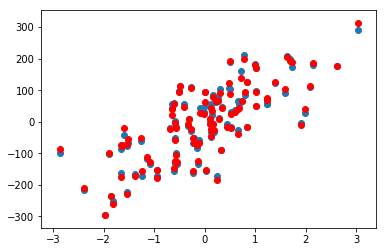

In [18]:
predictions=model(X,theta_final)
plt.scatter(x[:,0],y)
plt.scatter(x[:,0],predictions,c='r')

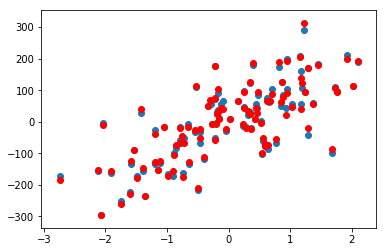

In [19]:
predictions=model(X,theta_final)
plt.scatter(x[:,1],y)
plt.scatter(x[:,1],predictions,c='r')

### Comments:

## comments

# STEP 6 COURBE D'APPRENTISSAGE

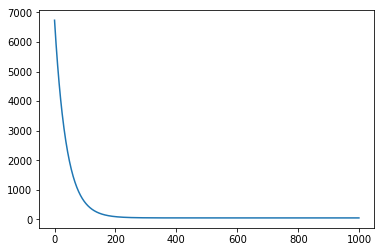

In [20]:
plt.plot(range(1000),cost_history)

### Comments:

# COEFFICIENT DE DETERMINATION

In [21]:
def coef_determination(y,pred):
    u= ((y-pred)**2).sum()  # La somme de carrées residuelles ou le residus de la somme de carrées
    v= ((y-y.mean())**2).sum() # La somme total
    return 1-u/v

In [22]:
coef_determination(y,predictions)

0.993012933421474

# Plotting in 3D

In [23]:
from mpl_toolkits.mplot3d import Axes3D 

<IPython.core.display.Javascript object>


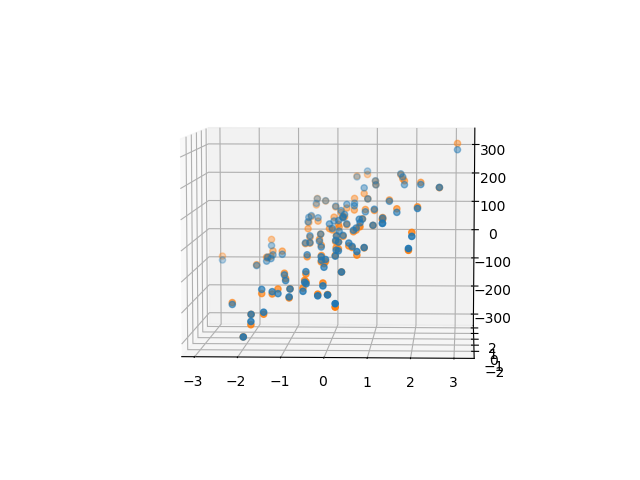

In [24]:
%matplotlib notebook
fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

ax.scatter(x[:,0],x[:,1],y)
ax.scatter(x[:,0],x[:,1],predictions)

# FIN